In [2]:
import maximizacion
from importlib import reload
reload(maximizacion)

<module 'maximizacion' from 'c:\\Users\\Manu\\OneDrive\\Escritorio\\UTN\\Simulación\\TP6\\maximizacion.py'>

In [3]:
maxm = maximizacion.Maximizacion(n_loops=10_000, n_repeticiones=5)
maxm.generar_punto_de_partida()
maxm.optimizar()

Iteración 0 x: 19 y: 0.4436540586436921 z: 1042.692960684642 
 desplzaiento x: 0.5159486496884074 desplazamiento y: 0.0
Iteración 1 x: 19.515948649688408 y: 0.4436540586436921 z: 1068.6442949991592 
 desplzaiento x: 0.34491432355487633 desplazamiento y: 0.0
Iteración 2 x: 19.860862973243282 y: 0.4436540586436921 z: 1068.3633930732829 
 desplzaiento x: 0.34446438730131834 desplazamiento y: 0.0
Iteración 3 x: 20.2053273605446 y: 0.4436540586436921 z: 1088.559521717628 
 desplzaiento x: -0.005128446750609328 desplazamiento y: -0.006491295276089205
Iteración 4 x: 20.20019891379399 y: 0.4371627633676029 z: 1087.9893593150232 
 desplzaiento x: 0.042240108682822214 desplazamiento y: 0.005701624026048648
Iteración 5 x: 20.242439022476812 y: 0.4428643873936515 z: 1087.9103921900191 
 desplzaiento x: -0.04236939059530414 desplazamiento y: -0.0002528694304282908
Iteración 6 x: 20.200069631881508 y: 0.44261151796322323 z: 1088.559521717628 
 desplzaiento x: -0.005128446750609328 desplazamiento y: 

(20.01333213654452, 0.5355914239156185)

In [4]:
import plotly.graph_objs as go
from math import floor

# Example list of tuples (x, y, z)
#data = [max.tracking[floor(len(max.tracking)/10)*i-1] for i in range(10)]
data = maxm.tracking

# Extracting x, y, z coordinates from the list of tuples

# Extracting x, y, z coordinates from the list of tuples
x = [point[0] for point in data]
y = [point[1] for point in data]
z = [point[2] for point in data]

# Create trace for the curve
trace_curve = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='lines',
    line=dict(color='blue', width=3),
    name='Curve'
)

# Create traces for the directional arrows
arrows = []
for i in range(len(x)-1):
    arrow = go.Cone(
        x=[x[i+1]],
        y=[y[i+1]],
        z=[z[i+1]],
        u=[x[i+1]-x[i]],
        v=[y[i+1]-y[i]],
        w=[z[i+1]-z[i]],
        sizemode='absolute',
        sizeref=0.25,
        showscale=False,
        colorscale='Reds',
        opacity=0.5,
        name='Arrow '+str(i+1)
    )
    arrows.append(arrow)

# Create layout
layout = go.Layout(
    scene=dict(
        aspectmode="cube",
        xaxis=dict(title='X'),
        yaxis=dict(title='Y'),
        zaxis=dict(title='Z')
    )
)

# Create figure
fig = go.Figure(data=[trace_curve] + arrows, layout=layout)

# Show plot
fig.show()


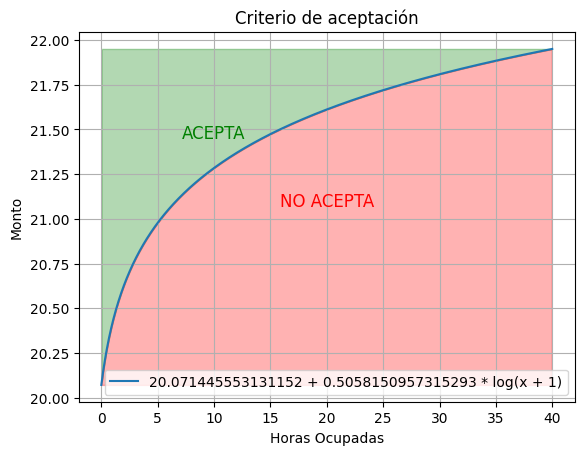

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a list of tuples containing (b, m, z)
data = maxm.tracking
# Find the tuple with the maximum z value
max_tuple = max(data, key=lambda x: x[2])
b_max, m_max, z_max = max_tuple

# Define the function b + m * log(x+1)
def function(x, b, m):
    return b + m * np.log(x + 1)

f = lambda x: function(x, b_max, m_max)

# Generate x values
x_values = np.linspace(0, 40, 1000)

# Generate y values using the function with the maximum b and m
y_values = function(x_values, b_max, m_max)

# Plot the function
plt.plot(x_values, y_values, label=f'{b_max} + {m_max} * log(x + 1)')

# Shade the area above the curve
plt.fill_between(x_values, y_values, max(y_values), color='green', alpha=0.3, where=(x_values >0)&(x_values<40))

# Shade the area below the curve
plt.fill_between(x_values, y_values, min(y_values), color='red', alpha=0.3, where=(x_values >0)&(x_values<40))

# Label the areas
plt.text(10, max(y_values) -0.5, 'ACEPTA', horizontalalignment='center', fontsize=12, color='green')
plt.text(20, min(y_values)+1, 'NO ACEPTA', horizontalalignment='center', fontsize=12, color='red')

# Add legend
plt.legend()

# Add labels and title
plt.xlabel('Horas Ocupadas')
plt.ylabel('Monto')
plt.title('Criterio de aceptación')

# Show plot
plt.grid(True)
plt.show()
